In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
all_months_data=pd.DataFrame()
files=[file for file in os.listdir("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")] #this came from copy path
for file in files:
    df=pd.read_csv("A:/Data Analytics/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" +file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("combined_data.csv", index=False)
all_data=pd.read_csv("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\combined_data.csv")
all_data=all_data.dropna(how='all')
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #Make float
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Q4 : What products are most often sold together ?

In [3]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\ypawa\AppData\Local\Temp\ipykernel_15332\2135456998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [4]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [5]:
#this will give the most common 3
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [6]:
#this will give the most common 4
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


In [7]:
## These stats can help one, to choose that which proudcts should be kept together.

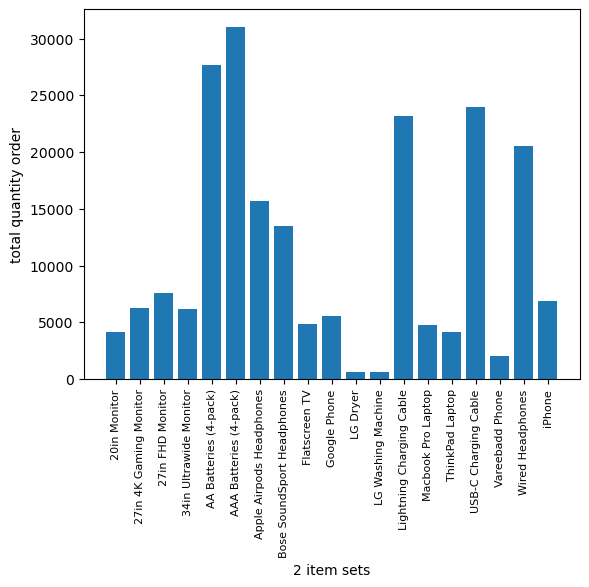

In [9]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xlabel("2 item sets")
plt.ylabel("total quantity order")
plt.xticks(keys, rotation='vertical', size=8)
plt.show()